In [62]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import re

In [92]:
CIQUAL_DATASET_PATH = 'data/TableCiqual2017_ExcelFR_2017 11 17.xls'

ciqual_df = pd.read_excel(CIQUAL_DATASET_PATH)
ciqual_df.head(5)

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_fr.1,"Energie, Règlement UE N° 1169/2011 (kcal/100g)",...,Vitamine K1 (µg/100g),Vitamine K2 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g),Vitamine B12 (µg/100g)
0,1,101,0,entrées et plats composés,salades composées et crudités,-,25600,"Céleri rémoulade, préemballé","Céleri rémoulade, préemballé",-,...,-,-,"25,2","< 0,04","< 0,04","0,38","0,28","0,19",28,"< 0,08"
1,1,101,0,entrées et plats composés,salades composées et crudités,-,25601,"Salade de thon et légumes, appertisée, égouttée","Salade de thon et légumes, appertisée, égouttée",-,...,-,-,"2,75","< 0,04","0,053","4,45","< 0,16","0,29",31,"1,45"
2,1,101,0,entrées et plats composés,salades composées et crudités,-,25602,"Salade composée avec viande ou poisson, appert...","Salade composée avec viande ou poisson, appert...",-,...,"9,75",-,-,"0,032","0,022","4,13","0,2","0,12","11,1","1,23"
3,1,101,0,entrées et plats composés,salades composées et crudités,-,25605,Champignon à la grecque,Champignon à la grecque,-,...,-,-,"10,3","0,062","0,2","1,88","0,76","0,11","27,3","0,018"
4,1,101,0,entrées et plats composés,salades composées et crudités,-,25606,Salade de pommes de terre maison,Salade de pommes de terre maison,-,...,-,-,10,"0,077","0,06","0,89","0,53","0,14",7,0


The dataframe has 3 hierarchical columns for the categories of food. We can use those to extract some specific types of aliments such as 'fruits' or 'vegetables'.

In [8]:
ciqual_df['alim_grp_nom_fr'].value_counts()

viandes, œufs, poissons                        739
fruits, légumes, légumineuses et oléagineux    437
produits céréaliers                            402
entrées et plats composés                      308
boissons                                       274
lait et produits laitiers                      245
aides culinaires et ingrédients divers         191
matières grasses                                71
produits sucrés                                 67
aliments infantiles                             36
glaces et sorbets                               26
Name: alim_grp_nom_fr, dtype: int64

In [9]:
ciqual_df['alim_ssgrp_nom_fr'].value_counts()

légumes                                              208
charcuteries                                         159
viandes crues                                        153
plats composés                                       137
céréales de petit-déjeuner et biscuits               137
boissons sans alcool                                 129
fromages                                             125
viandes cuites                                       125
poissons crus                                        108
eaux                                                  96
produits laitiers frais et assimilés                  96
fruits                                                93
gâteaux et pâtisseries                                79
pains et viennoiseries                                78
pâtes, riz et céréales                                64
sauces                                                63
poissons cuits                                        61
produits à base de poissons et 

In [11]:
ciqual_df['alim_ssssgrp_nom_fr'].value_counts()

-                                         1032
légumes crus                               113
légumes cuits                               91
bœuf et veau                                75
biscuits sucrés                             64
                                          ... 
laits de vache concentrés ou en poudre       5
boissons rafraîchissantes lactées            4
légumes séchés ou déshydratés                4
plats de poisson et féculents                4
sauces sucrées                               2
Name: alim_ssssgrp_nom_fr, Length: 76, dtype: int64

In [93]:
vegetables_df = ciqual_df[ciqual_df['alim_ssgrp_nom_fr'] == 'légumes']
vegetables_df.head(5)

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_fr.1,"Energie, Règlement UE N° 1169/2011 (kcal/100g)",...,Vitamine K1 (µg/100g),Vitamine K2 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g),Vitamine B12 (µg/100g)
308,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,13004,"Avocat, pulpe, cru","Avocat, pulpe, cru",155,...,"14,5",-,"4,07","0,05","0,13","1,2","0,77","0,12","79,9",0
309,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20004,"Bette ou blette, crue","Bette ou blette, crue","12,3",...,"< 0,8",-,"3,08","< 0,015","0,015","< 0,1","0,2","0,036","24,7",0
310,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20009,"Carotte, crue","Carotte, crue","36,4",...,"13,8",-,"5,84","0,054","0,047","0,99","0,28","0,13","32,3",0
311,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20010,"Champignon, tout type, cru","Champignon, tout type, cru","21,6",...,0,-,"3,4","0,084","0,42","4,55","1,75","0,082",29,0
312,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20012,"Salade ou chicorée frisée, crue","Salade ou chicorée frisée, crue","22,7",...,298,-,"18,5","0,07","0,088","0,45","1,03","0,063",126,0


It is interesting to note that the vegetables are present in both in 'raw' and 'cooked' form (french: cuit et cru), thus it would be interesting to analyse the differences in nutrients when cooking the vegetables differently.  

In [94]:
vegetables_raw_df = vegetables_df[vegetables_df['alim_ssssgrp_nom_fr'].str.contains('crus')]
vegetables_raw_df.head(5)

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_fr.1,"Energie, Règlement UE N° 1169/2011 (kcal/100g)",...,Vitamine K1 (µg/100g),Vitamine K2 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g),Vitamine B12 (µg/100g)
308,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,13004,"Avocat, pulpe, cru","Avocat, pulpe, cru",155,...,"14,5",-,"4,07","0,05","0,13","1,2","0,77","0,12","79,9",0
309,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20004,"Bette ou blette, crue","Bette ou blette, crue","12,3",...,"< 0,8",-,"3,08","< 0,015","0,015","< 0,1","0,2","0,036","24,7",0
310,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20009,"Carotte, crue","Carotte, crue","36,4",...,"13,8",-,"5,84","0,054","0,047","0,99","0,28","0,13","32,3",0
311,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20010,"Champignon, tout type, cru","Champignon, tout type, cru","21,6",...,0,-,"3,4","0,084","0,42","4,55","1,75","0,082",29,0
312,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20012,"Salade ou chicorée frisée, crue","Salade ou chicorée frisée, crue","22,7",...,298,-,"18,5","0,07","0,088","0,45","1,03","0,063",126,0


In [95]:
vegetables_cooked_df = vegetables_df[vegetables_df['alim_ssssgrp_nom_fr'].str.contains('cuits')]
vegetables_cooked_df.head(5)

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_fr.1,"Energie, Règlement UE N° 1169/2011 (kcal/100g)",...,Vitamine K1 (µg/100g),Vitamine K2 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g),Vitamine B12 (µg/100g)
421,2,201,20102,"fruits, légumes, légumineuses et oléagineux",légumes,légumes cuits,20000,"Artichaut, cuit","Artichaut, cuit","33,2",...,"14,8",-,"9,1","0,05","0,089","1,11","0,24","0,081",89,0
422,2,201,20102,"fruits, légumes, légumineuses et oléagineux",légumes,légumes cuits,20001,"Asperge, bouillie/cuite à l'eau","Asperge, bouillie/cuite à l'eau","19,8",...,"65,3",-,"16,1","0,11","0,12","1,06","0,19","0,05",142,0
423,2,201,20102,"fruits, légumes, légumineuses et oléagineux",légumes,légumes cuits,20002,"Aubergine, cuite","Aubergine, cuite","32,7",...,"2,9",-,"1,3","0,076","0,02","0,6","0,075","0,086",14,0
424,2,201,20102,"fruits, légumes, légumineuses et oléagineux",légumes,légumes cuits,20003,"Betterave rouge, cuite","Betterave rouge, cuite","47,2",...,"0,2",-,"3,6","0,027","0,04","0,33","0,15","0,067",80,0
425,2,201,20102,"fruits, légumes, légumineuses et oléagineux",légumes,légumes cuits,20005,"Bette ou blette, cuite","Bette ou blette, cuite","12,1",...,"< 0,8",-,"< 0,5","< 0,015","< 0,01","< 0,1","0,17","0,024","43,2",0


Let's analyse the difference in vitamins composition between raw and cooked vegetables. We keep only the vitamin columns:

In [96]:
vitamins_columns = vegetables_cooked_df.columns[vegetables_cooked_df.columns.str.contains('Vitamine')]

vitamins_raw_df = vegetables_raw_df[vitamins_columns].copy()
#vitamins_raw_df.head(5)

vitamins_cooked_df = vegetables_cooked_df[vitamins_columns].copy()
vitamins_cooked_df.head(5)

,Vitamine D (µg/100g),Vitamine E (mg/100g),Vitamine K1 (µg/100g),Vitamine K2 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g),Vitamine B12 (µg/100g)
421,0,"0,19","14,8",-,"9,1","0,05","0,089","1,11","0,24","0,081",89,0
422,0,"1,35","65,3",-,"16,1","0,11","0,12","1,06","0,19","0,05",142,0
423,0,"0,41","2,9",-,"1,3","0,076","0,02","0,6","0,075","0,086",14,0
424,0,"0,04","0,2",-,"3,6","0,027","0,04","0,33","0,15","0,067",80,0
425,"< 0,25","0,41","< 0,8",-,"< 0,5","< 0,015","< 0,01","< 0,1","0,17","0,024","43,2",0


Unfortunately, these columns are strings (with the decimal numbers with the french notation with a comma instead of a point), so we need to convert them to float numbers. Additionally, we have the special caracters `<` and `>` that are sometimes present. To remove these, we simply convert them to the value next to the `<` or `>` sign.

Additionally, the column `Vitamine K2 (µg/100g)` contains only the value `-` (meaning there is no available information according to the [dataset description](https://ciqual.anses.fr/cms/sites/default/files/inline-files/TableCiqual2017_Excel_docFR.pdf)), and similarly the column `Vitamine B12 (µg/100g)` is almost empty or 0, so we drop them.

In [97]:
vitamins_raw_df.drop(columns=['Vitamine K2 (µg/100g)', 'Vitamine B12 (µg/100g)'], inplace=True)
vitamins_cooked_df.drop(columns=['Vitamine K2 (µg/100g)', 'Vitamine B12 (µg/100g)'], inplace=True)

def convert_to_float(value):
    # TODO replace '-' and other incorret values with NaN instead of 0 ?
    try:
        float_value = float(value.replace(',', '.'))
        return float_value
    except ValueError:
        if value == '-':
            return 0.0
        else:
            numbers = re.findall( r'\d+\.*\d*', value)
            
            if numbers:
                return float(numbers[0])
            else:
                return 0.0

vitamins_raw_df = vitamins_raw_df.applymap(convert_to_float)
#vitamins_raw_df.head(5)

vitamins_cooked_df = vitamins_cooked_df.applymap(convert_to_float)
vitamins_cooked_df.head(5)

,Vitamine D (µg/100g),Vitamine E (mg/100g),Vitamine K1 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g)
421,0.0,0.19,14.8,9.1,0.050,0.089,1.11,0.240,0.081,89.0
422,0.0,1.35,65.3,16.1,0.110,0.120,1.06,0.190,0.050,142.0
423,0.0,0.41,2.9,1.3,0.076,0.020,0.60,0.075,0.086,14.0
424,0.0,0.04,0.2,3.6,0.027,0.040,0.33,0.150,0.067,80.0
425,0.0,0.41,0.0,0.0,0.000,0.000,0.00,0.170,0.024,43.2


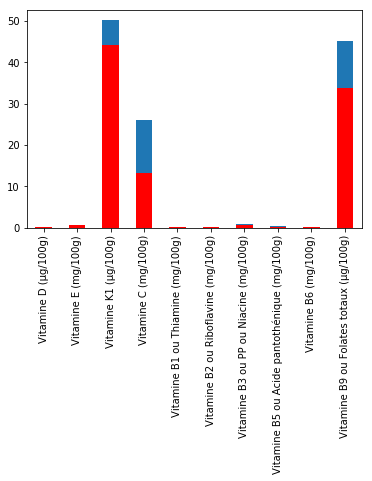

<Figure size 432x288 with 0 Axes>

In [111]:
plt.figure()
ax = vitamins_raw_df.mean().plot.bar()

plt.figure()
vitamins_cooked_df.mean().plot.bar(ax=ax, color='red')

plt.show()

We clearly see that part of the vitamins K1m C and B9 are lost in the cooking process.